<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [9]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [10]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="lightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [11]:
ensaios = np.array([ [-1, -1], [1, -1], [-1, 1], [1, 1] ])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [12]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [13]:
ensaios = doe.ff2n(2)

In [14]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [15]:
experimento = pd.DataFrame(ensaios, columns=['Farinha', 'Chocolate'])

In [16]:
experimento.head()

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [17]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [18]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="lightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [19]:
import seaborn as sns

In [20]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
# CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
# PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
# PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, 
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, 
# YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
# binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, 
# copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, 
# gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
# gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, 
# jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, 
# plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, 
# summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, 
# viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('nipy_spectral')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

/home/whysk4s/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


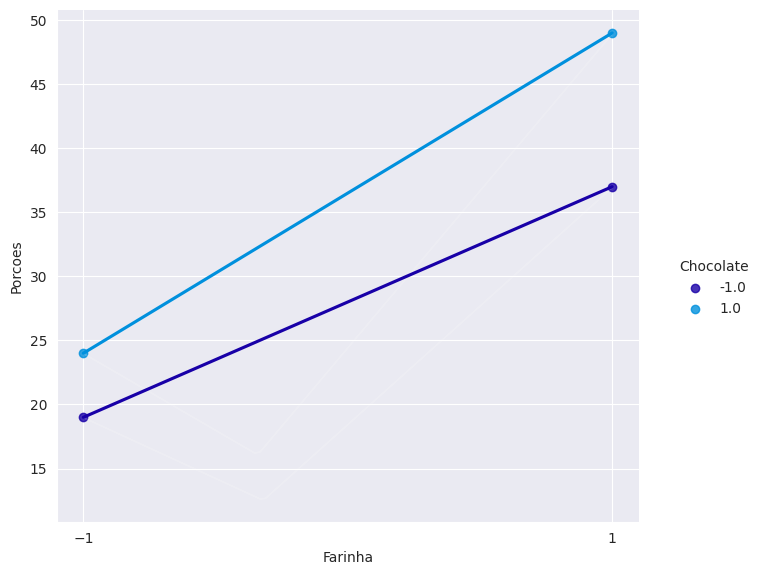

In [21]:
ax = sns.lmplot(data=experimento,
                x='Farinha',
                y='Porcoes',
                ci=False,
                hue='Chocolate',
                )
ax.set(xticks = (-1, 1))
ax.fig.set_size_inches(8, 6);

### Para o chocolate

/home/whysk4s/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


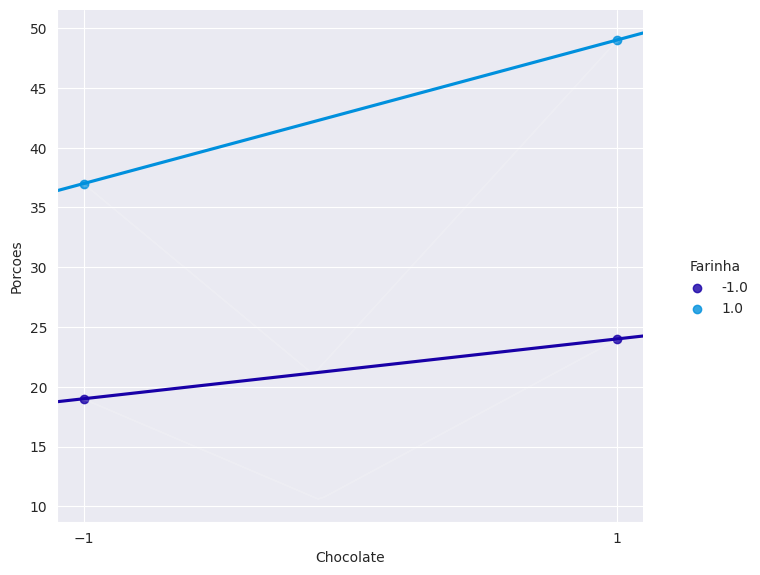

In [22]:
ax = sns.lmplot(data=experimento,
                x='Chocolate',
                y='Porcoes',
                ci=False,
                hue='Farinha',
                truncate=False
                )
ax.set(xticks = (-1, 1))
ax.fig.set_size_inches(8,6);

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [25]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [29]:
modelo_ajustado = modelo.fit()

In [30]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                nan
Time:                        14:48:54   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/home/whysk4s/.local/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/whysk4s/.local/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/whysk4s/.local/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/whysk4s/.local/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/whysk4s/.local/lib/python3.11/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning:

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [31]:
centro = np.array([ [0, 0, 29],
                    [0, 0, 30],
                    [0, 0, 29],
                    [0, 0, 30]])

In [36]:
centro_df = pd.DataFrame(centro, columns=['Farinha', 'Chocolate', 'Porcoes'], index=[4, 5, 6, 7])

In [37]:
centro_df.head()

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [41]:
experimento = pd.concat([experimento, centro_df])

In [42]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [43]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [44]:
modelo_ajustado = modelo.fit()

In [45]:
print(modelo_ajustado.summary(title='Modelo 02'))

                                  Modelo 02                                   
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 12 Sep 2023   Prob (F-statistic):            0.00152
Time:                        14:58:33   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/home/whysk4s/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [48]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [50]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [61]:
from scipy.stats import t as t_student

### .

In [62]:
distribuicao = t_student(df=4)

### .


In [64]:
distribuicao.ppf(0.975)

2.7764451051977987

In [65]:
limite = [distribuicao.ppf(0.975)]*len(nome)

### Plotando o gráfico 

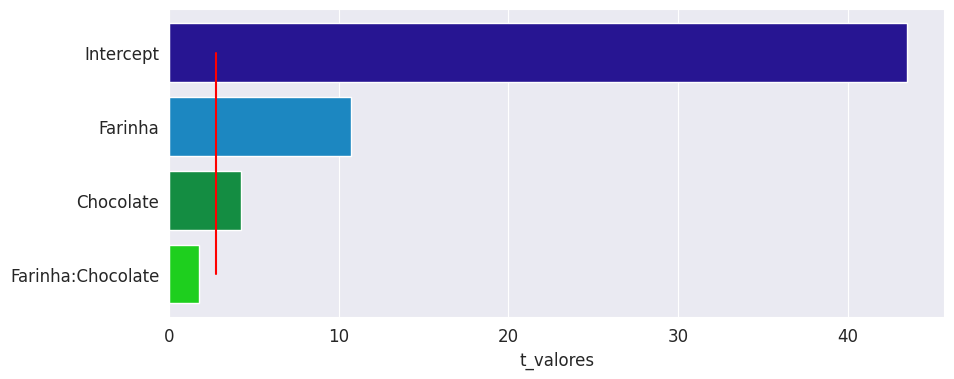

In [68]:
ax = sns.barplot(x = t_valores, y = nome)
ax.figure.set_size_inches(10, 4)
ax.tick_params(labelsize=12)
ax.set_xlabel('t_valores', fontsize=12)
ax.plot(limite, nome, 'red')


# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [69]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate')

In [70]:
modelo_ajustado = modelo.fit()

In [71]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           0.000571
Time:                        15:24:40   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/home/whysk4s/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [73]:
t_valores = modelo_ajustado.tvalues
t_valores


Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [74]:
nomes = t_valores.index.tolist()
nomes

['Intercept', 'Farinha', 'Chocolate']

### .

In [81]:
distribuicao = t_student(df=5)

In [82]:
distribuicao.ppf(0.975)

2.5705818366147395

In [84]:
limite = [distribuicao.ppf(0.975)]*len(nomes)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

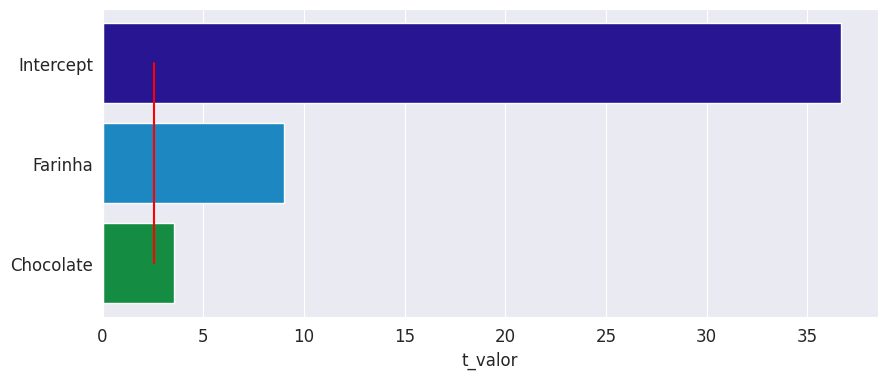

In [86]:
ax = sns.barplot(x=t_valores, y=nomes)
ax.figure.set_size_inches(10, 4)
ax.tick_params(labelsize=12)
ax.set_xlabel('t_valor', fontsize=12)
ax.plot(limite, nomes, 'r')


<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [90]:
observados = experimento['Porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [91]:
preditos = modelo_ajustado.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [92]:
import matplotlib.pyplot as plt

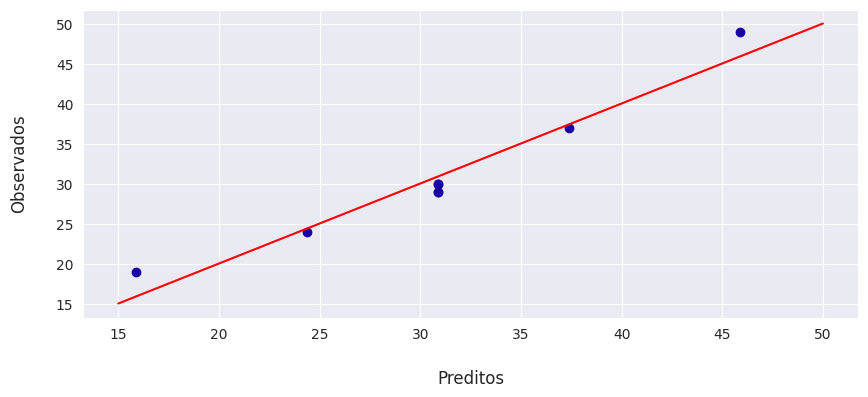

In [103]:
plt.figure(figsize=(10,4))

plt.xlabel('Preditos', fontsize=12, labelpad=20)
plt.ylabel('Observados', fontsize = 12, labelpad=20)

x = np.linspace(start=15, stop=50, num=10)
y = np.linspace(start=15, stop=50, num=10)

plt.plot(x, y, 'r')

plt.scatter(preditos, observados);

<hr>

In [105]:
print(modelo_ajustado.summary(title='Modelo 02'))

                                  Modelo 02                                   
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           0.000571
Time:                        20:10:33   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/home/whysk4s/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [106]:
parametros = modelo_ajustado.params
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [115]:
def modelo_receita (x_f, x_c):

  limite_normalizado = [-1, 1]

  limite_farinha = [0.5, 1.5]

  limite_chocolate = [0.1, 0.5]

  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido

  return int(np.floor(porcoes))


In [118]:
modelo_receita(0.6, 0.1)

18


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [121]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [122]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### .

In [161]:
pontos = [[modelo_receita(x, y) for y in x_chocolate] for x in x_farinha]

In [162]:
pontos

[[15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
 [18, 19, 20, 21, 22, 22, 23, 24, 25, 26],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [23, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [25, 26, 27, 28, 29, 30, 31, 32, 32, 33],
 [27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
 [30, 31, 32, 33, 33, 34, 35, 36, 37, 38],
 [32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
 [37, 38, 39, 40, 41, 42, 43, 43, 44, 45]]

### Construindo a superfície de resposta

In [125]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

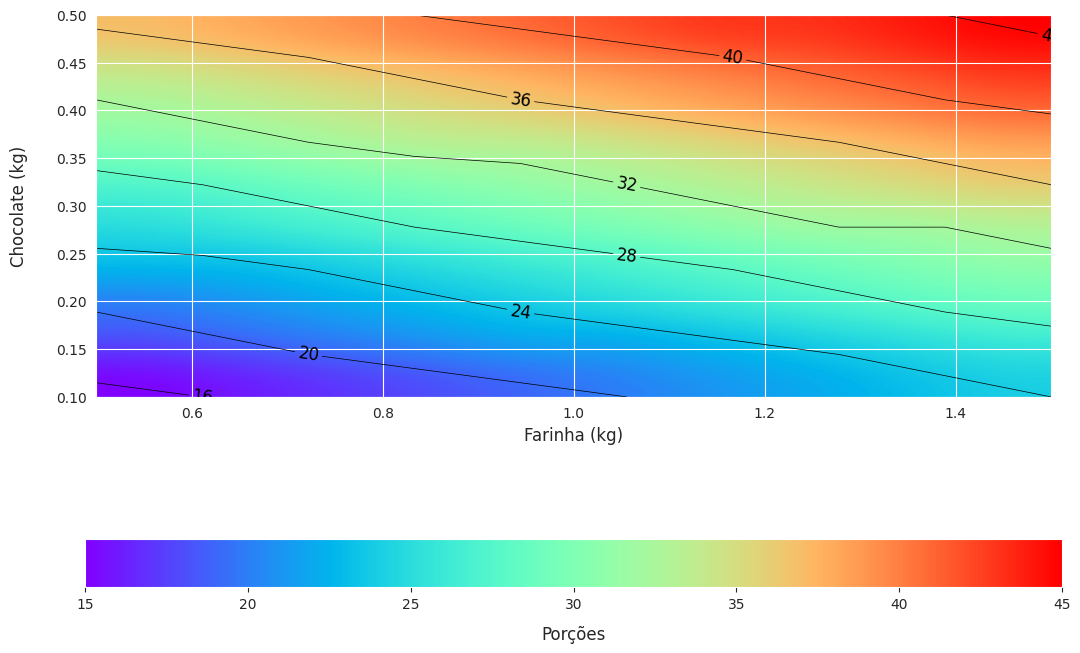

In [205]:
plt.figure(figsize=(14,8))
plt.xlabel('Farinha (kg)', fontsize=12)
plt.ylabel('Chocolate (kg)', fontsize=12, labelpad=20)

ax = plt.imshow(pontos, origin='lower', cmap= cm.rainbow, interpolation='quadric', extent=(0.5, 1.5, 0.1, 0.5))

plt.colorbar(orientation='horizontal', pad=0.23, shrink=0.9).set_label('Porções', fontsize=12, labelpad=10)

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=0.5)

plt.clabel(linhas, inline=True, fontsize=12, inline_spacing=5);